# Problema 1:
Repita o problema feito em sala de aula (seção 1.5) utilizando o banco de dados contendo informações de mulheres pacientes com câncer ovariano. Durante a aula usamos o PCA como uma técnica obtida a partir do SVD aplicado a matriz centralizada. Usando o MATLAB ou Python (fique a vontade para escolher a linguagem), neste exercı́cio você deverá utilizar a função interna especı́fica que determina diretamente as componentes principais da matriz centralizada. Reproduza o gráfico da figura 1.15 usando tal abordagem.

## SVD

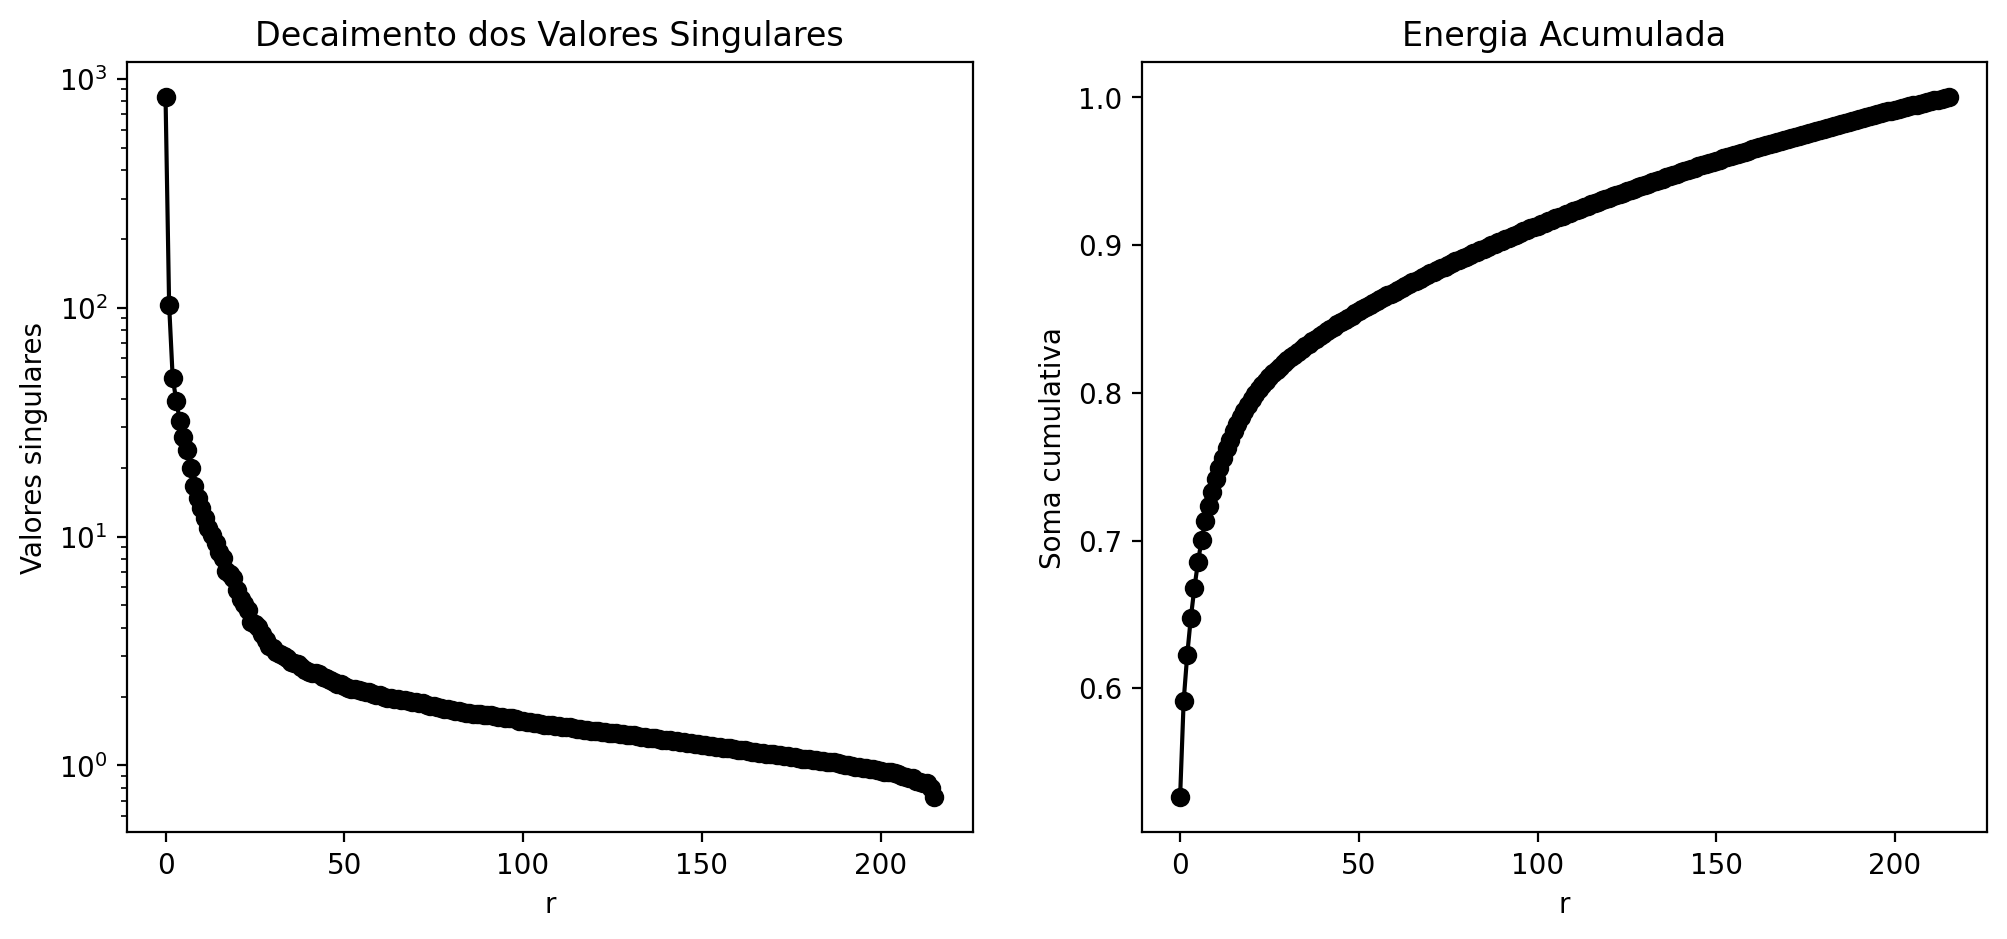

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# configurações dos gráficos
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams.update({'font.size': 10})

# carregar arquivo
dados_brutos = pd.read_csv('ovariancancer_combinado.csv', header = 0)

# separa a coluna 'Grupo' dos dados brutos
grupos = dados_brutos.iloc[:, 0].values
dados  = dados_brutos.iloc[:, 1:]

# decomposição SVD
U, S, VT = np.linalg.svd(dados, full_matrices=False)

# soma cumulativa
cumulative_sum = np.cumsum(S)/np.sum(S)

# gráficos
plt.subplot(1, 2, 1)
plt.semilogy(S, '-o', color='black')
plt.xlabel('r')
plt.ylabel('Valores singulares')
plt.title('Decaimento dos Valores Singulares')

plt.subplot(1, 2, 2)
plt.plot(cumulative_sum, '-o', color='black')
plt.xlabel('r')
plt.ylabel('Soma cumulativa')
plt.title('Energia Acumulada')

plt.show()

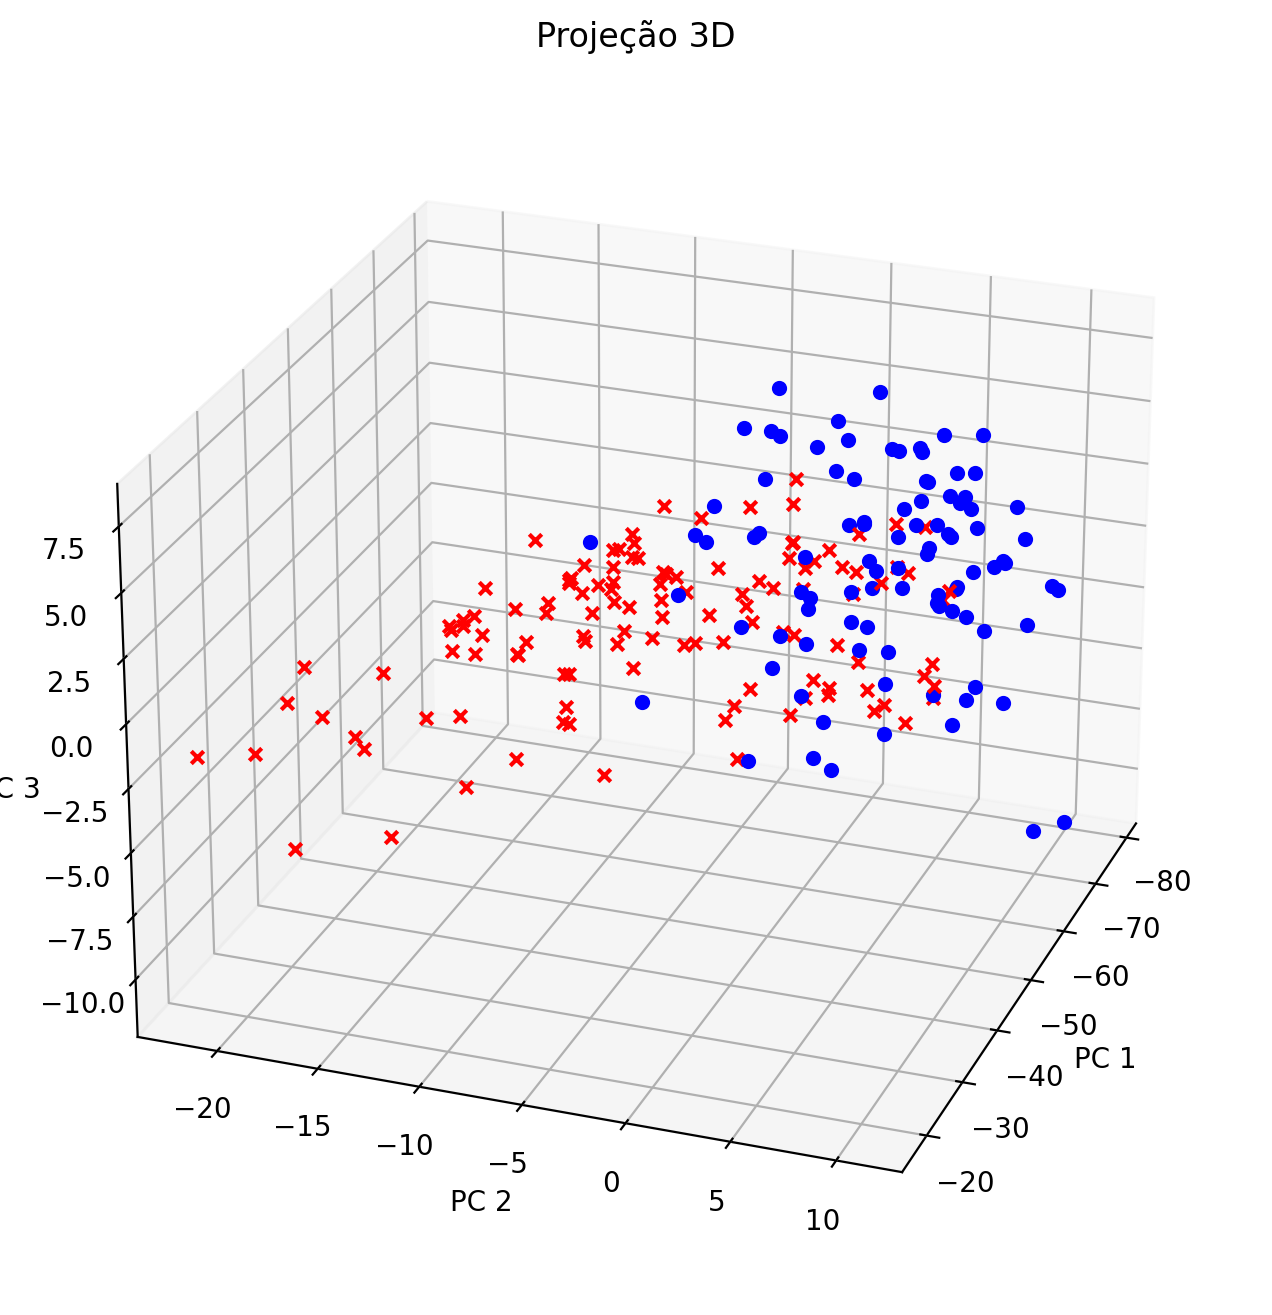

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# configurações dos gráficos
plt.rcParams['figure.figsize'] = [30, 8]
plt.rcParams.update({'font.size': 10})

# gráfico 3D
ax = plt.subplot(1, 1, 1, projection='3d')

for j in range(len(dados)):
    x = np.dot(VT[0, :], dados.iloc[j, :])
    y = np.dot(VT[1, :], dados.iloc[j, :])
    z = np.dot(VT[2, :], dados.iloc[j, :])

    if grupos[j] == 'Cancer':
        ax.scatter(x, y, z, marker='x', color='red', s=20)
    else:
        ax.scatter(x, y, z, marker='o', color='blue', s=20)

# rótulos e título
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('Projeção 3D')
ax.view_init(elev=25, azim=20)

plt.show()

## PCA

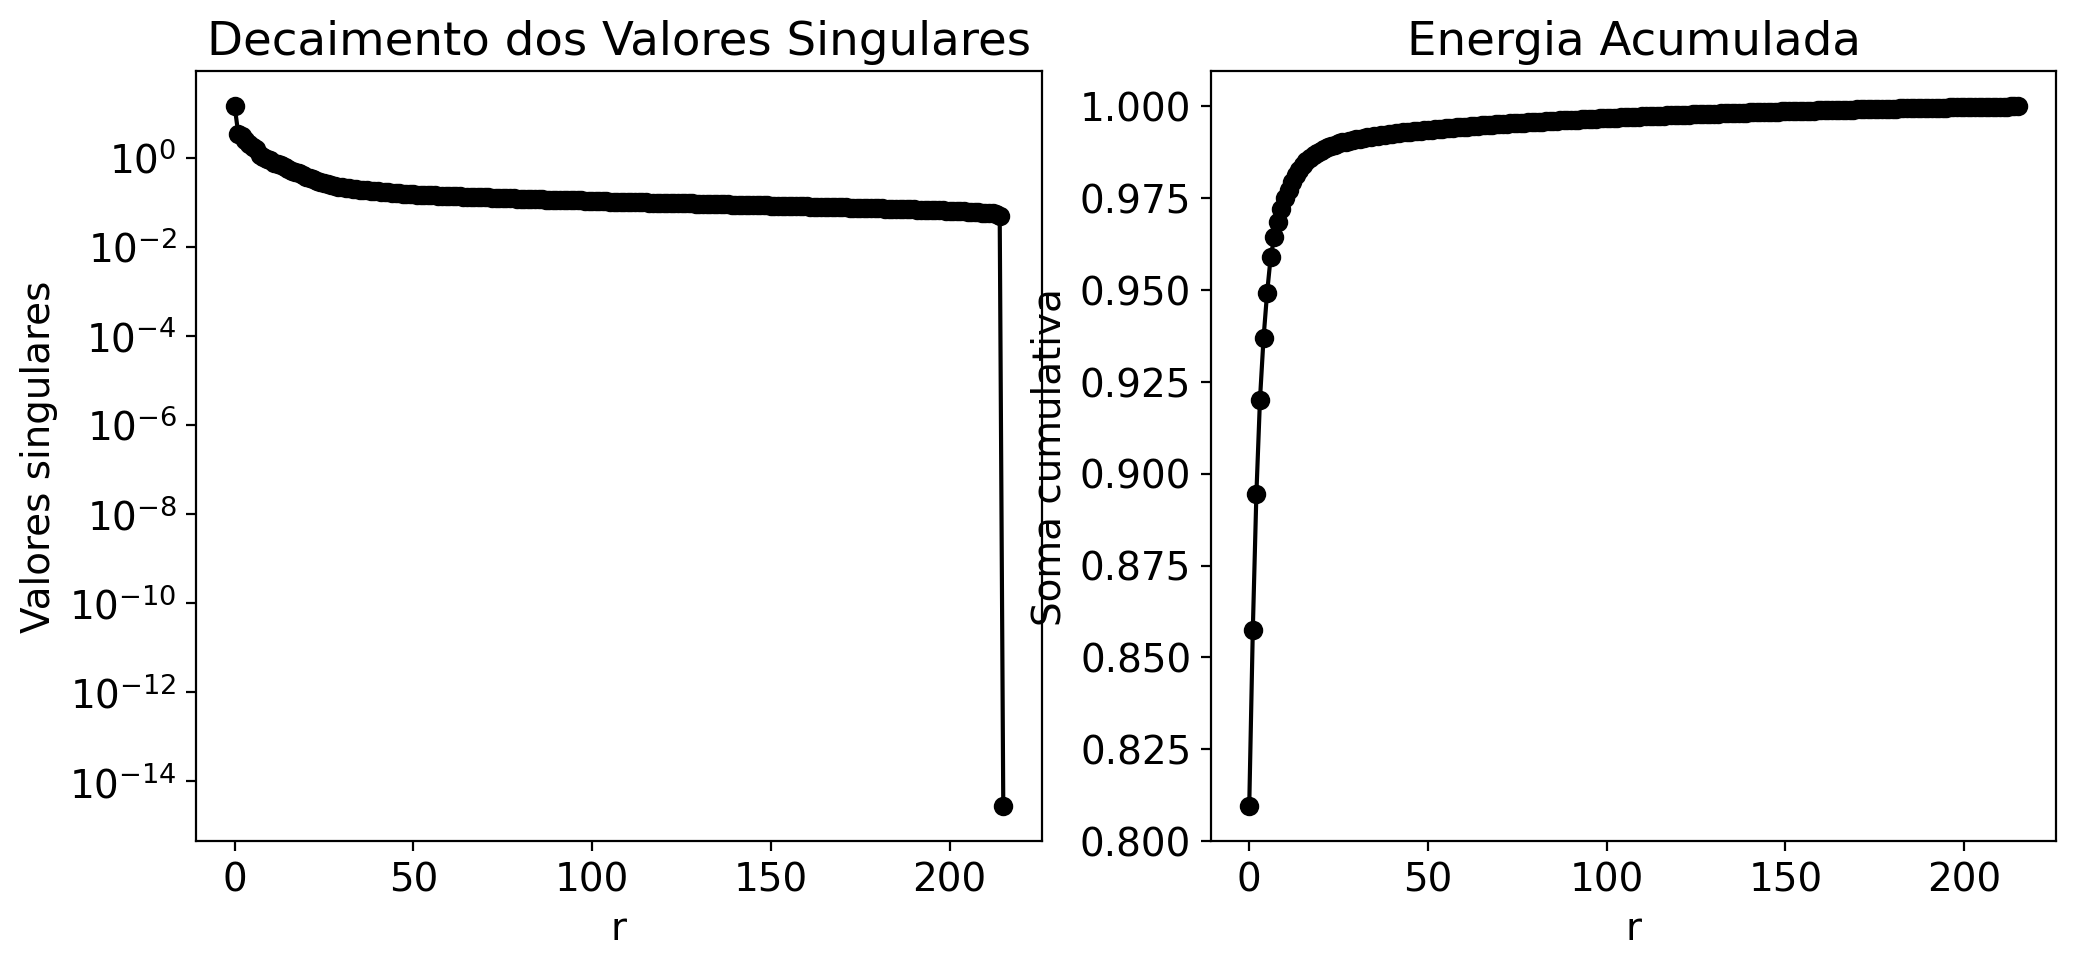

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# configurações dos gráficos
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams.update({'font.size': 14})

# carregar arquivo
dados_brutos = pd.read_csv('ovariancancer_combinado.csv', header = 0)

# separa a coluna 'Grupo' dos dados brutos
grupos = dados_brutos.iloc[:, 0].values
dados  = dados_brutos.iloc[:, 1:]

# PCA
pca = PCA()
X_pca = pca.fit_transform(dados)

# gráficos
plt.subplot(1, 2, 1)
plt.semilogy(np.sqrt(pca.explained_variance_), '-o', color='black')
plt.xlabel('r')
plt.ylabel('Valores singulares')
plt.title('Decaimento dos Valores Singulares')

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o', color='black')
plt.xlabel('r')
plt.ylabel('Soma cumulativa')
plt.title('Energia Acumulada')

plt.show()

Gráfico com outlier retirado

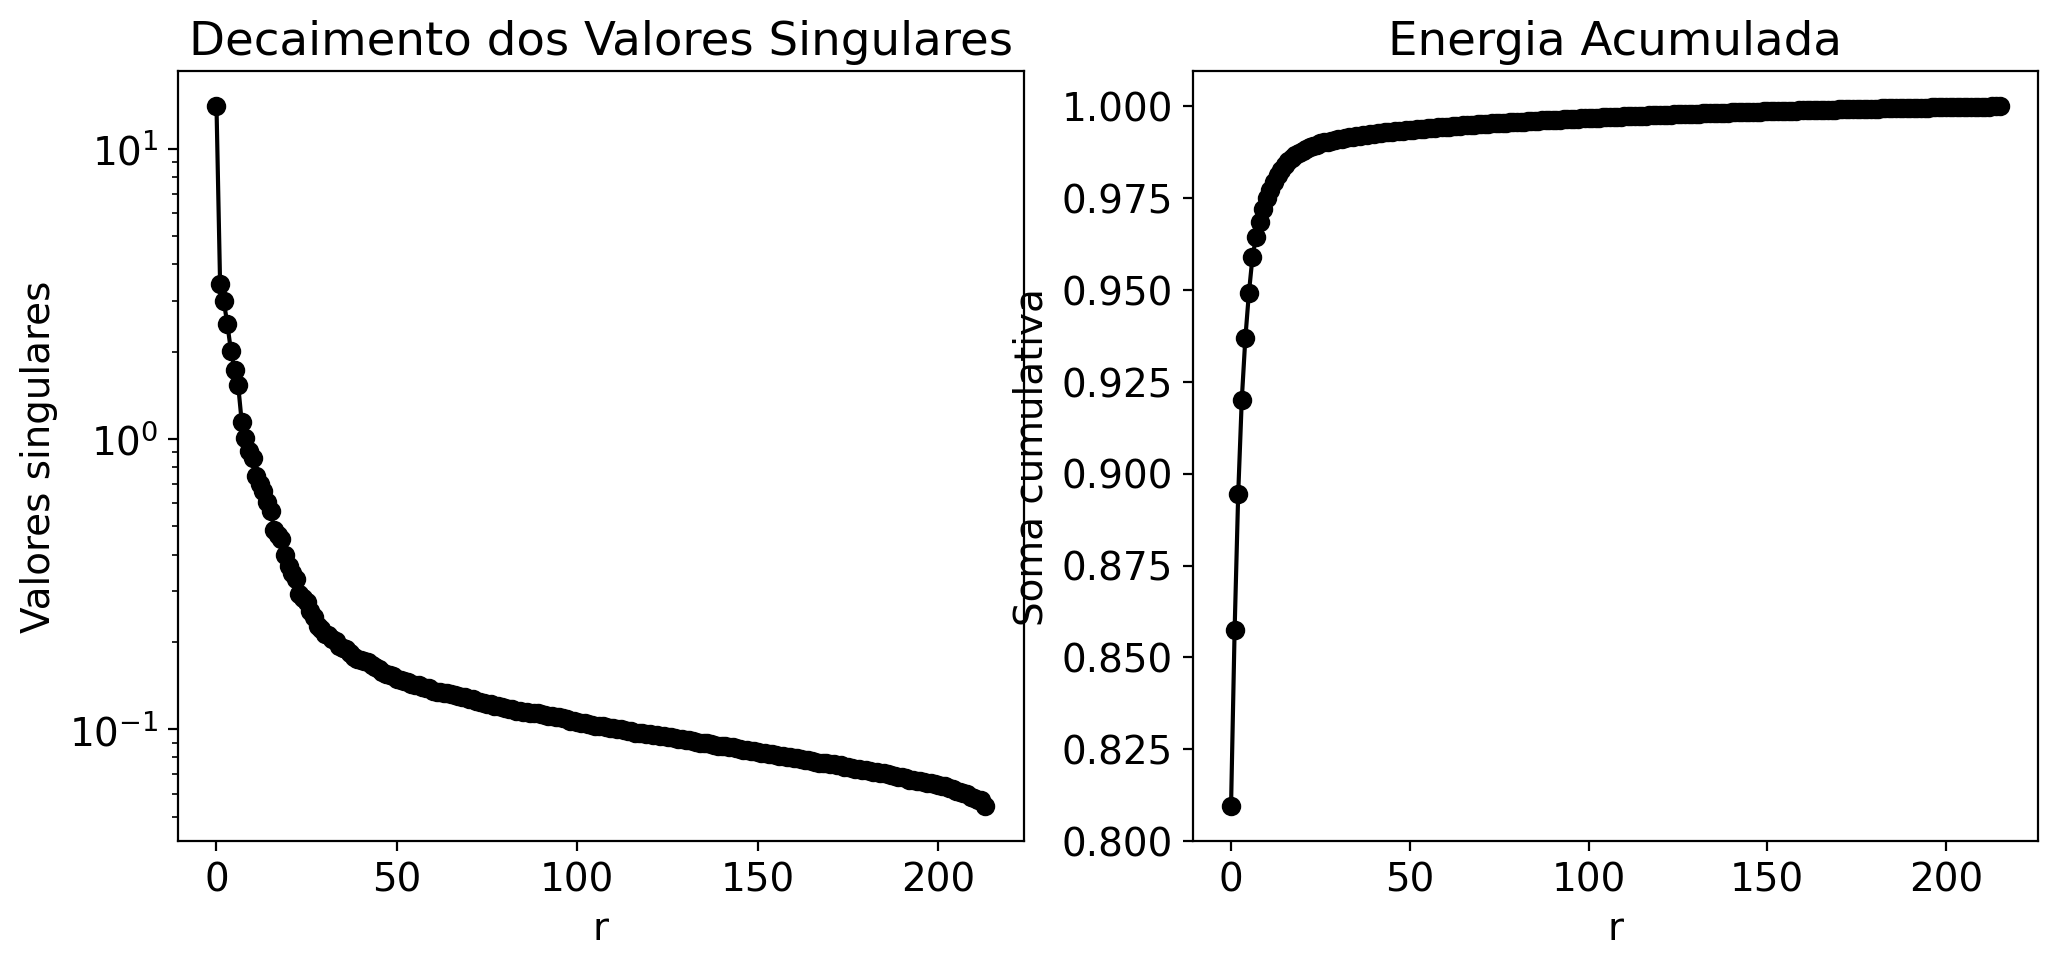

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# configurações dos gráficos
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams.update({'font.size': 14})

# carregar arquivo
dados_brutos = pd.read_csv('ovariancancer_combinado.csv', header = 0)

# separa a coluna 'Grupo' dos dados brutos
grupos = dados_brutos.iloc[:, 0].values
dados  = dados_brutos.iloc[:, 1:]

# PCA
pca = PCA()
X_pca = pca.fit_transform(dados)

# gráficos
plt.subplot(1, 2, 1)
plt.semilogy(np.sqrt(pca.explained_variance_)[0:214], '-o', color='black')
plt.xlabel('r')
plt.ylabel('Valores singulares')
plt.title('Decaimento dos Valores Singulares')

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o', color='black')
plt.xlabel('r')
plt.ylabel('Soma cumulativa')
plt.title('Energia Acumulada')

plt.show()

# Problema 2:
Considere a seção 1.6 ”Eigenfaces Example”. Usando os códigos disponı́veis no livro reproduza a análise feita utilizando o SVD e o PCA. Obtenha o gráfico do espectro dos valores singulares mostrados na figura 1.17 e o gráfico da figura 1.21. Faça uma discussão detalhada dos resultados obtidos.

## SDV

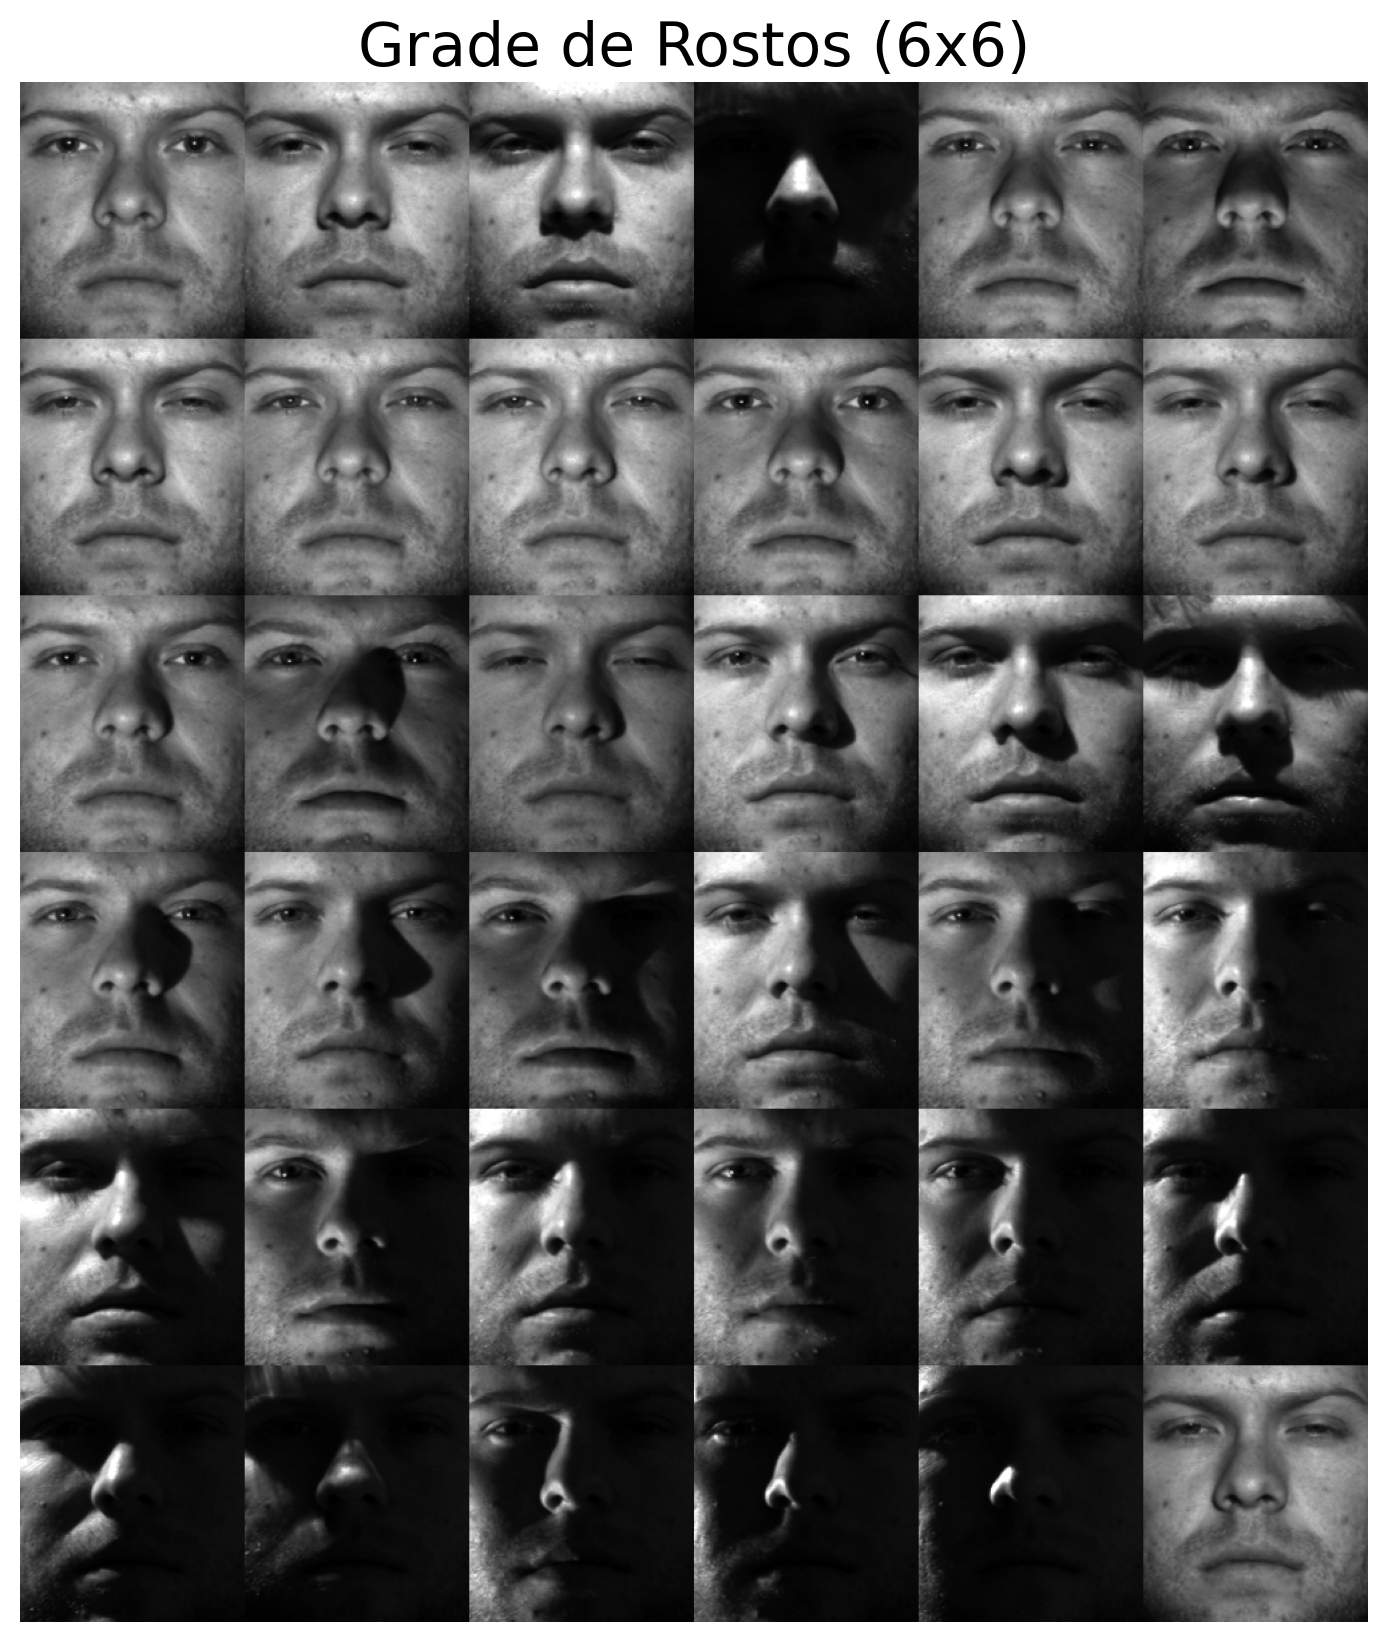

In [4]:
# cod melhorado
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

# fontes gráficos
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)

# Carrega dados do arquivo .mat
mat = scipy.io.loadmat('allFaces.mat')
faces = mat['faces']
m = int(mat['m'])
n = int(mat['n'])

# Número de imagens a exibir (6x6)
num_imgs = 36
img_grid = np.zeros((n * 6, m * 6))

# Insere cada imagem na grade
for i in range(6):
    for j in range(6):
        idx = i * 6 + j
        face = faces[:, idx].reshape((m, n)).T
        img_grid[i * n:(i + 1) * n, j * m:(j + 1) * m] = face

# Exibe a grade de rostos
plt.imshow(img_grid, cmap='gray')
plt.axis('off')
plt.title('Grade de Rostos (6x6)')
plt.show()


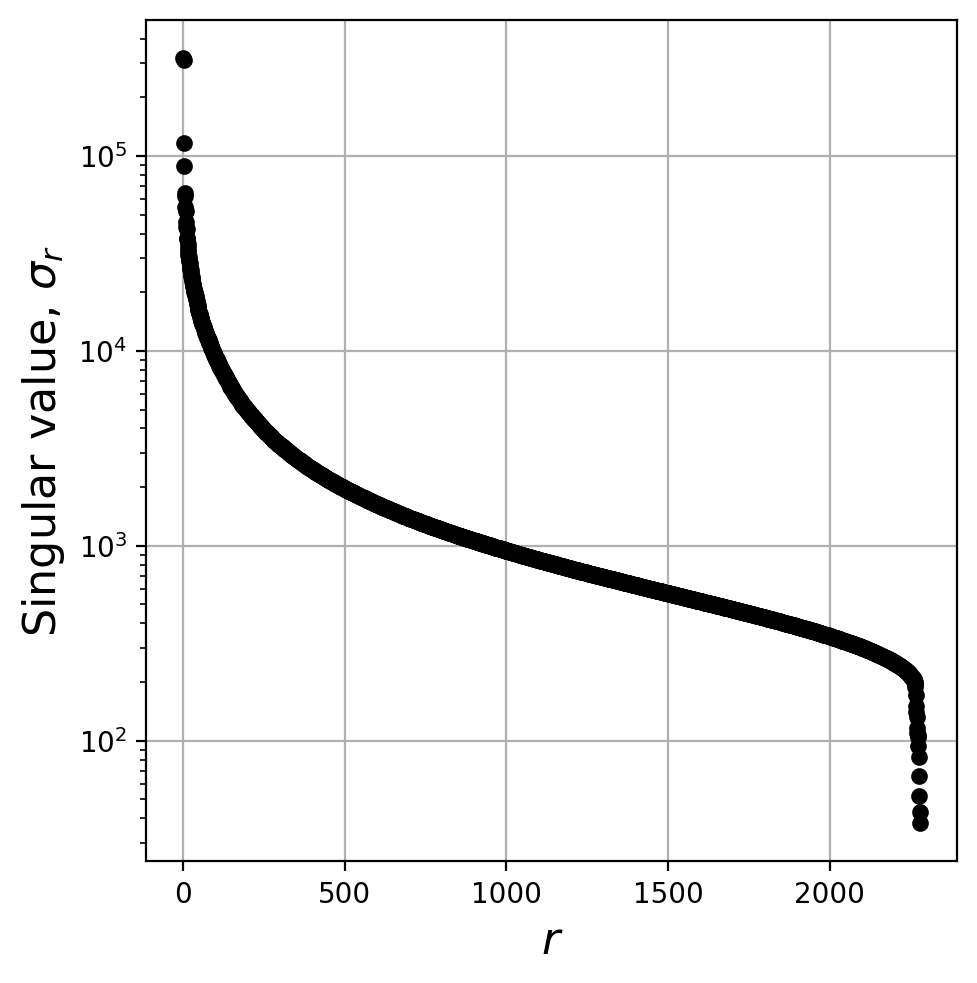

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# carrega dados
mat    = scipy.io.loadmat('allFaces.mat')
faces  = mat['faces']
nfaces = np.ndarray.flatten(mat['nfaces'])
m      = int(mat['m'])
n      = int(mat['n'])

# treinamento
trainingFaces = faces[:, :np.sum(nfaces[:36])]
avgFace       = np.mean(trainingFaces, axis=1)

# subtração da média dos rostos
X = trainingFaces - np.tile(avgFace, (trainingFaces.shape[1], 1)).T

# SVD
U, S1, VT = np.linalg.svd(X, full_matrices=False)

# eliminar outlier
if S1[-1] < np.float64(1e-5):
    S1[-1] = np.float64(0)

# gráficos
plt.figure(figsize=(5, 5))
plt.semilogy(S1, 'ko', markersize=5)
plt.xlabel(r'$r$', fontsize=16)
plt.ylabel(r'Singular value, $\sigma_r$', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

## PCA

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.decomposition import PCA

# carrega os dados
mat    = scipy.io.loadmat('allFaces.mat')
faces  = mat['faces']
nfaces = np.ndarray.flatten(mat['nfaces'])
m      = int(mat['m'])
n      = int(mat['n'])

# treinamento
trainingFaces = faces[:, :np.sum(nfaces[:36])].T

# PCA
pca = PCA()
pca.fit(trainingFaces)

# valores singulares
S2 = np.sqrt(pca.explained_variance_*(trainingFaces.shape[0] - 1))

# eliminar outlier
if S2[-1] < np.float64(1e-5):
    S2[-1] = np.float64(0)

# gráficos
plt.figure(figsize=(5, 5))
plt.semilogy(S2, 'ko', markersize=5)
plt.xlabel(r'$r$', fontsize=16)
plt.ylabel(r'Singular value, $\sigma_r$', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

Os vetores S1 e S2, são equivalentes, conforme código abaixo, no qual a dispersão dos pontos tende a uma reta

In [0]:
# ajuste reta
a, b = np.polyfit(S1, S2, 1)
y = a* S1 + b

# gráfico
plt.scatter(S1, S2, s=2)
plt.plot(S1, y, color='red')
plt.xlabel('S1')
plt.ylabel('S2')
plt.title('Gráfico S1(SVD) e S2(PCA) com Reta Ajustada')

# Problema 3:
Carregue a imagem dog.jpg e converta para tons de cinza. Use a FFT para compactar a imagem em diferentes taxas de compactação. Trace o erro entre a imagem compactada e a imagem original como uma função da taxa de compactação.

# Problema 4:
Use a FFT para resolver a equação de Korteweg–de Vries (KdV), $u_t + u_{xxx }− uu_x = 0$, em um domínio grande com uma condição inicial $u(x, 0) = sech(x)$. Trace a evolução.